22ноя23
# Методы кластеризации. Метод k средних. Продолжение
В сегодняшнем уроке будет еще пара функций к коду из прошлого урока. А также новые примеры применения метода k средних.

Сначала я придумал совсем другой материал, но потом передумал. Решил, что тебе будет интереснее узнать как такой простой алгоритм, как метод k средних, применяется в машинном обучении.

Для примера возьму таблицу ирисов, она уже была в [одном](https://github.com/teacher57/data_analysis_course/blob/main/5th%20Lesson.ipynb) из предыдущих уроков.

In [1]:
# не обращай внимания, просто импортирую библиотеки

import lib.l6 as l6

from pandas import DataFrame, Series, read_csv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

Еще раз расскажу легенду этого фрейма. Речь идет про исследование, в котором померили по 4 параметра ирисов разных видов. В таблице 50 представителей каждого вида. Моя цель в этой работе научиться предсказывать вид ириса по его четырем параметрам размеров лепестка и чашелистика. 

In [2]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<IPython.core.display.Javascript object>


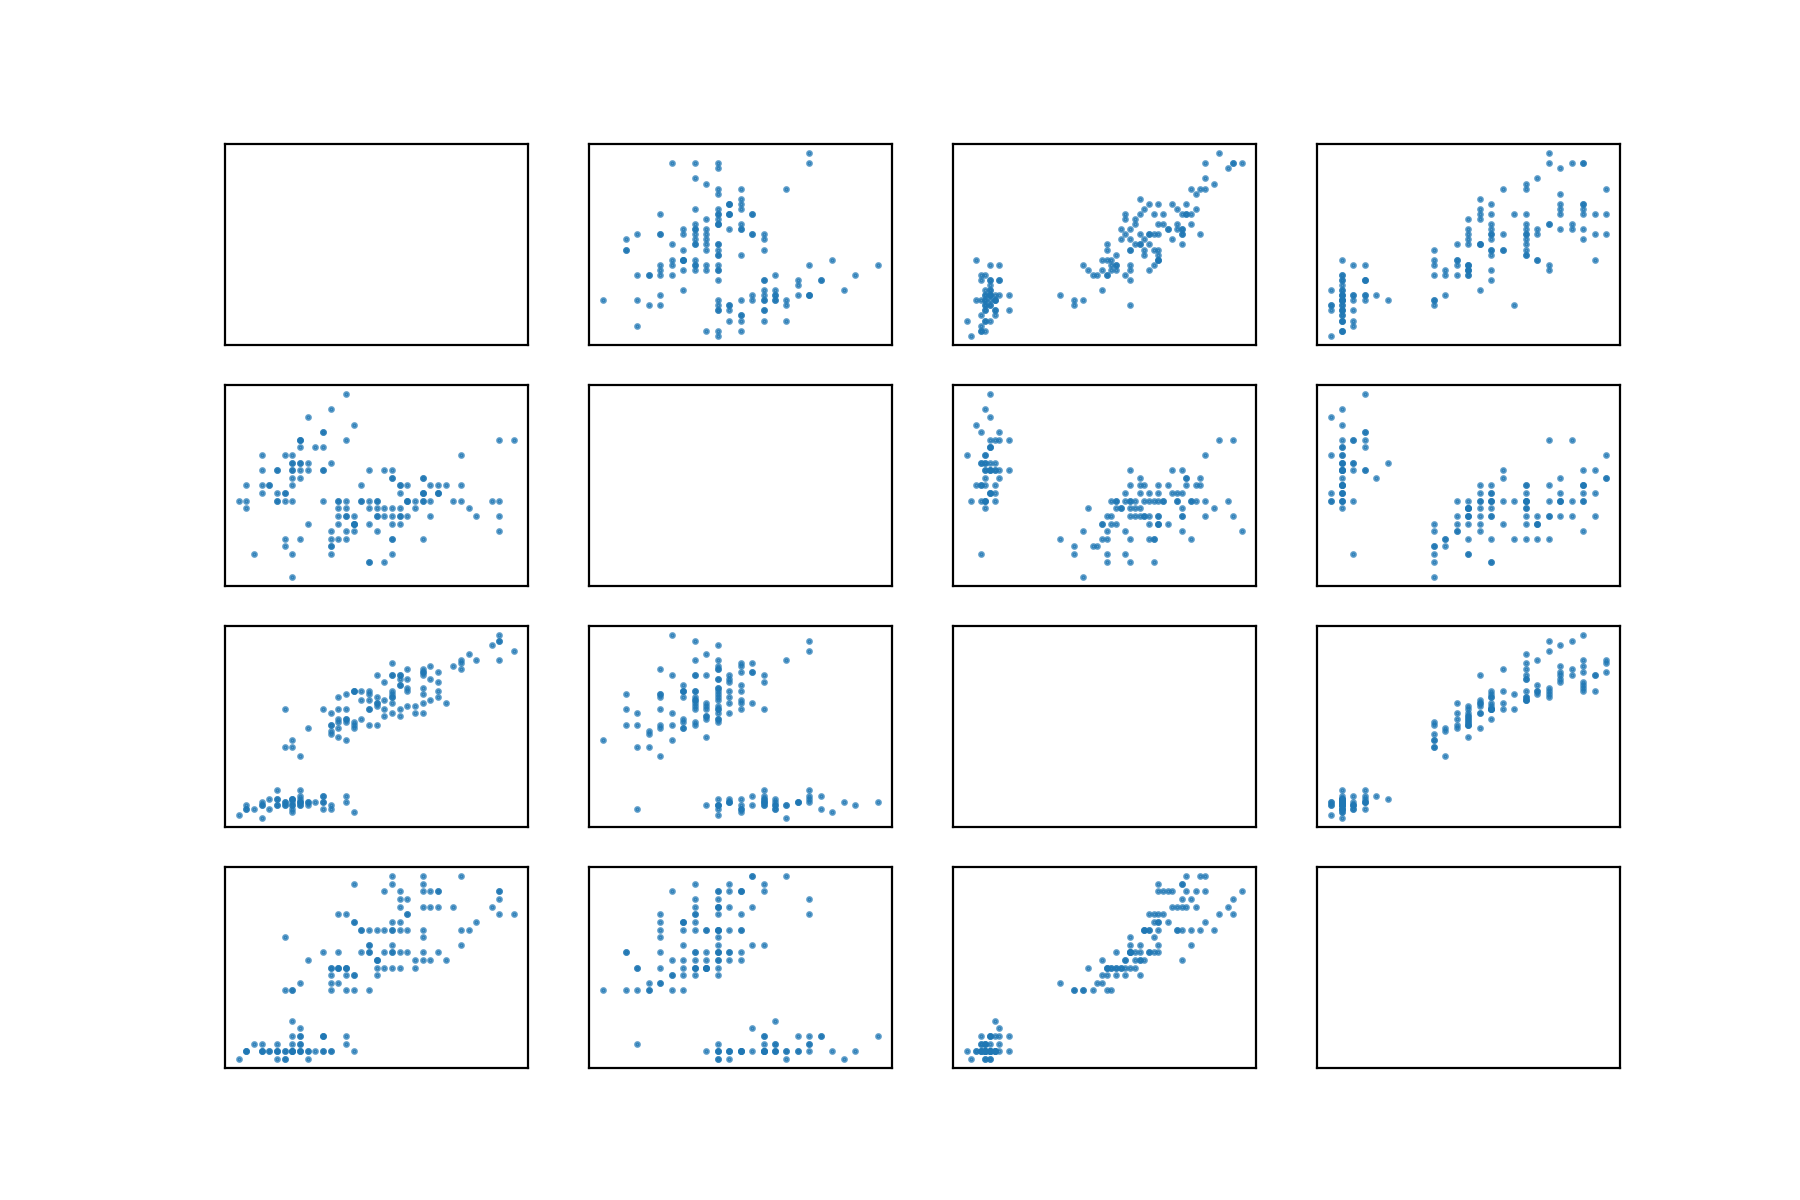

In [3]:
# вывожу на графики

fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i in range(4):
    for j in range(4):
        
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
        
        if i == j:
            continue
        
        axes[i, j].scatter(x=df[df.columns[j]], y=df[df.columns[i]], s=2, alpha=0.7)

plt.show()

In [6]:
# разбиваю фрейм на
# x – данные для предсказания

x, y = df.drop("variety", axis=1), df["variety"]
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# y – правильная кластеризация

y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [8]:
# в этот раз создам центры так, чтобы они изначально были представителями разных кластеров

centers = DataFrame(columns=x.columns)
s = list(set(df["variety"]))
np.random.seed(6)

for i in range(len(s)):
    temp = df[df["variety"] == s[i]]
    centers.loc[i] = temp.iloc[np.random.randint(0, len(temp))][:-1]
centers

,sepal.length,sepal.width,petal.length,petal.width
0,5.4,3.7,1.5,0.2
1,7.2,3.6,6.1,2.5
2,6.0,3.4,4.5,1.6


Эти две функции нужно будет написать самому.

## clusterize()

Эта функция берет на вход переменные *df* и *centers* (оба типа DataFrame). На выходе выдают фрейм аналогичный начальному, но с новым столбцом *cluster* по принципу того, к какому центру оказалась ближе каждая точка (она же строка фрейма). На прошлом уроке в домашнем задании была функция *find_closest_center()*, она обязательно пригодится при написании этой функции.

## move_centers()
Эта функция берет на вход те же переменные тех же типов, что и предыдущая. Но выдает новый фрейм центров, сдвинутых по методу нахождения k средних (см. 6-ой урок).

In [9]:
# 10 раз двигаю центры
# в переменной y_pred получаю предсказания о виде растения

for i in range(10):
    centers = l6.move_centers(x, centers)

y_pred = l6.clusterize(x, centers)["cluster"]
y_pred

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    2
147    1
148    1
149    2
Name: cluster, Length: 150, dtype: int64

In [10]:
# получаю точность алгоритма, поделив количество правильно угаданных строчек, на количество всех

check = y_pred == y.replace({s[i] : i for i in range(len(s))})
check.value_counts()[True] / check.size

0.8933333333333333

<IPython.core.display.Javascript object>


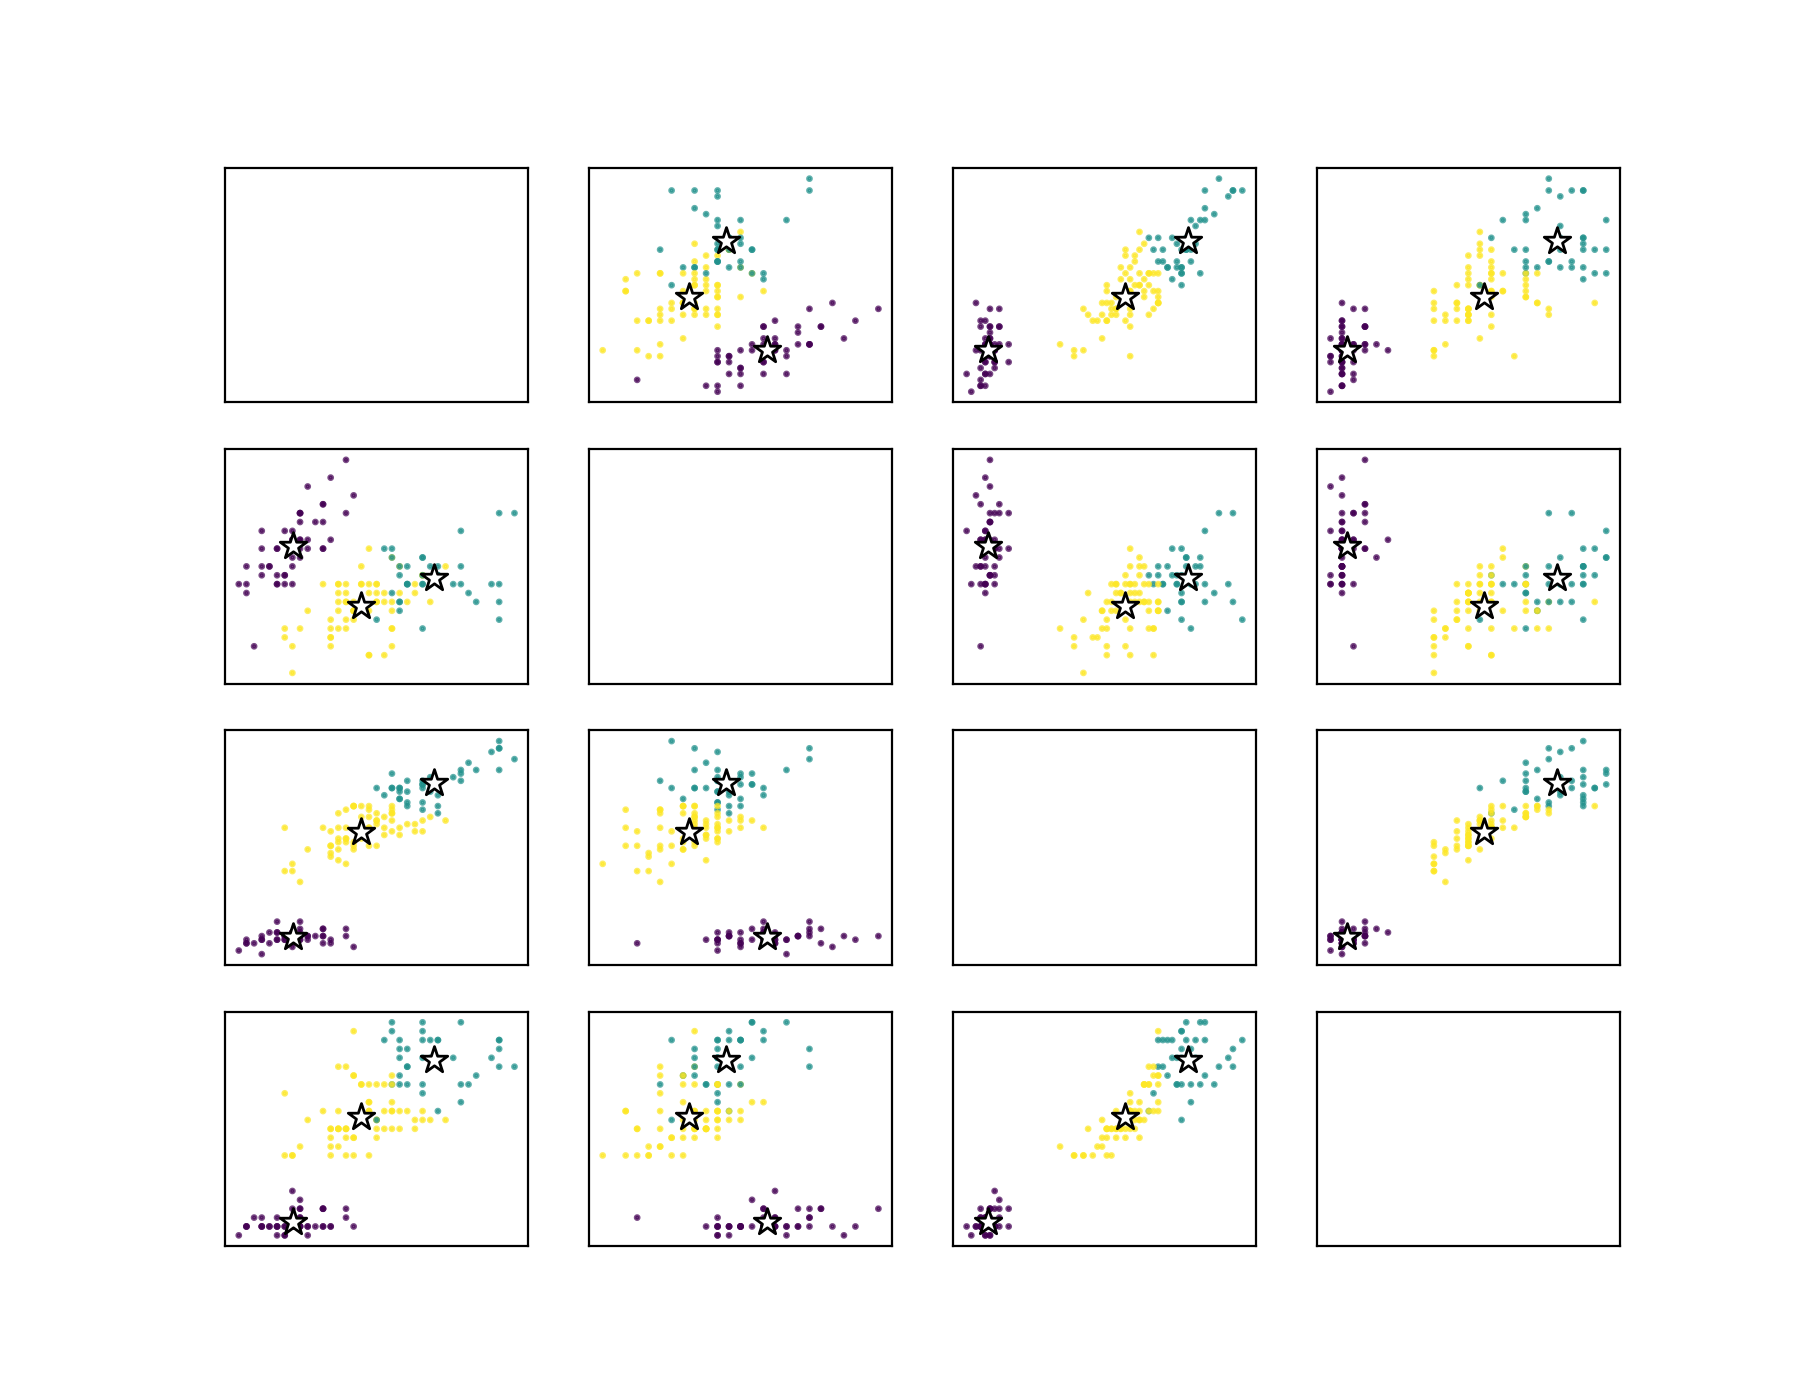

In [11]:
# снова вывожу на графики, теперь с центрами кластеров

fig, axes = plt.subplots(4, 4, figsize=(9, 7))
for i in range(4):
    for j in range(4):
        
        axes[i, j].get_xaxis().set_visible(False)
        axes[i, j].get_yaxis().set_visible(False)
        
        if i == j:
            continue
        
        axes[i, j].scatter(x=df[df.columns[j]], y=df[df.columns[i]], c=y_pred, s=2, alpha=0.7)
        axes[i, j].scatter(x=centers[df.columns[j]], y=centers[df.columns[i]], c="white", marker="*", s=100, edgecolors='black')

plt.show()

---

## Задачи для самостоятельного выполнения

Дедлайн 28ноя23 23:59.

В домашней работе нужно будет реализовать функции clusterize() и move_centers(), аналогичные функциям, представленным в уроке. Очень прошу в коде, который ты сдашь, проверить эти функции на данных [df](https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l7t1.csv) и [centers](https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l7t2.csv). Вот пример, у тебя должны получиться такие же данные в выводе.

Уточню, что мне нужен конкретно твой код, при выполнении работы можно пользоваться только библиотеками, пройденными в течение этого курса. Можно вдохновляться кодом из моего файла l6.py, но не переписывать его кусками.

In [12]:
url_df = "https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l7t1.csv"
df = read_csv(url_df)
df

,a,b,c
0,34,91,28
1,76,55,46
2,92,78,85
3,63,44,1
4,17,91,7
5,85,50,88
6,95,40,77
7,39,80,76
8,45,44,79
9,57,82,32


In [13]:
url_centers = "https://raw.githubusercontent.com/teacher57/data_analysis_course/main/files/l7t2.csv"
centers = read_csv(url_centers)
centers

,a,b,c
0,76,46,23
1,22,48,39


In [14]:
l6.clusterize(df, centers)

,a,b,c,cluster
0,34,91,28,1
1,76,55,46,0
2,92,78,85,0
3,63,44,1,0
4,17,91,7,1
5,85,50,88,0
6,95,40,77,0
7,39,80,76,1
8,45,44,79,1
9,57,82,32,0


In [15]:
l6.move_centers(df, centers)

,a,b,c
0,78.00,58.166667,54.833333
1,33.75,76.500000,47.500000
